![alt text](task.JPG "Задание")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

%matplotlib inline

class Solver:
    def step(self, input, func, t, dt):
        return 0

class EulerSolver(Solver):
    def step(self, input, func, t, dt):
        f = func(input, t)
        return (input[0] + dt * f[0], input[1] + dt * f[1])

class RungeKuttaSecondSolver(Solver):
    def step(self, input, func, t, dt):
        p = func(input, t)
        k = (input[0] + 0.5 * dt * p[0], input[1] + 0.5 * dt * p[1])
        p = func(k, t + dt * 0.5)
        return (input[0] + dt * p[0], input[1] + dt * p[1])

class RungeKuttaFourthSolver(Solver):
    def step(self, input, func, t, dt):
        p = func(input, t)
        k1 = (dt * p[0], dt * p[1])
        p =  func((input[0] + k1[0] * 0.5, input[1] + k1[1] * 0.5), t + dt * 0.5)
        k2 = (dt * p[0], dt * p[1])
        p = func((input[0] + k2[0] * 0.5, input[1] + k2[1] * 0.5), t + dt * 0.5)
        k3 = (dt * p[0], dt * p[1])
        p = func((input[0] + k3[0], input[1] + k3[1]), t + dt)
        k4 = (dt * p[0], dt * p[1])
        return (input[0] + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6.0,
                input[1] + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6.0)

class PPEq:
    def __init__(self, epsilon = 0.001):
        self.x0 = 1.0
        self.t0 = 0.0
        self.func = lambda x, t: 0# lambda x, t: -x
        self.exact_sol = lambda x: 0 # lambda x: np.exp(-x)
        self.epsilon = 0.001
        self.a = 10
        self.b = 2
        self.c = 2
        self.d = 10

    def xRight(self,x, y):
        return self.a * x - self.b * x * y

    def yRight(self,x, y):
        return self.c * x * y - self.d * y 
    
    def f(self, pos, t):
        return (self.xRight(pos[0], pos[1]), self.yRight(pos[0], pos[1]))

In [2]:
ppeq = PPEq()
start = (0,0)
def simulate(solver, startX, startY, dt, count):
    global ppeq
    result = list()
    current_pos = (startX, startY)
    t = 0.
    result.append(current_pos)
    for i in range(count):
        result.append(current_pos)
        current_pos = solver.step(current_pos, PPEq().f, t, dt)
        t+=dt
    return result

def test_func(solver, x, y, dt, steps):
    res = simulate(RungeKuttaSecondSolver(), x, y, dt, steps)
    x_list = list()
    y_list = list()
    t = list()
    for i in range(steps):
        x_list.append(res[i][0])
        y_list.append(res[i][1])
        t.append(dt * i)
    plt.rcParams['figure.figsize'] = [10, 10]
    fig, ax = plt.subplots()
    plt.title("Фазовый")
    ax.plot(x_list, y_list)
    plt.rcParams['figure.figsize'] = [11, 5]
    fig, ax = plt.subplots()
    plt.title("Решение")
    ax.plot(t, x_list)
    ax.plot(t, y_list)

def test_all_solvers_func(x, y, dt, steps):
    res = simulate(RungeKuttaSecondSolver(), 10, 30, 0.002, steps)
    res_1 = simulate(RungeKuttaFourthSolver(), 10, 30, 0.002, steps)
    res_2 = simulate(EulerSolver(), 10, 30, 0.002, steps)
    x_list = list()
    y_list = list()
    x_list_1 = list()
    y_list_1 = list()
    x_list_2 = list()
    y_list_2 = list()
    t = list()
    for i in range(steps):
        x_list.append(res[i][0])
        y_list.append(res[i][1])
        x_list_1.append(res_1[i][0])
        y_list_1.append(res_1[i][1])
        x_list_2.append(res_2[i][0])
        y_list_2.append(res_2[i][1])
        t.append(dt * i)
    plt.rcParams['figure.figsize'] = [11, 5]
    fig, ax = plt.subplots()
    plt.title("Фазовый")
    ax.plot(x_list, y_list, color="blue")
    ax.plot(x_list_1, y_list_1, color="red")
    ax.plot(x_list_2, y_list_2, color="green")
    plt.rcParams['figure.figsize'] = [11, 5]
    fig, ax = plt.subplots()
    plt.title("Решение")
    ax.plot(t, x_list)
    ax.plot(t, y_list)
    ax.plot(t, x_list_1)
    ax.plot(t, y_list_1)
    ax.plot(t, x_list_2)
    ax.plot(t, y_list_2)

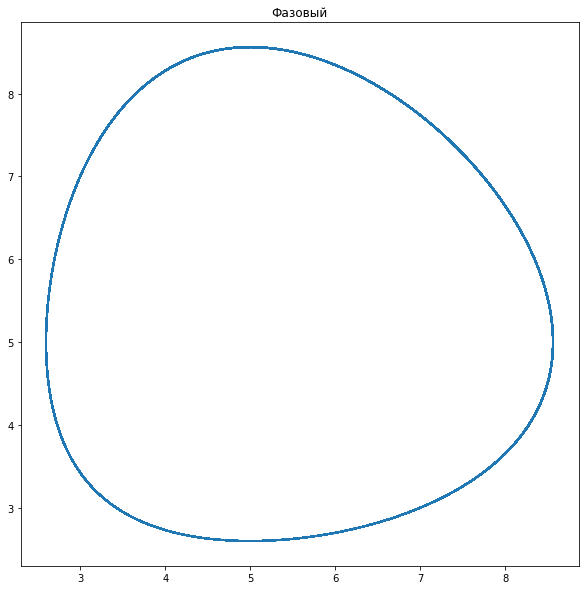

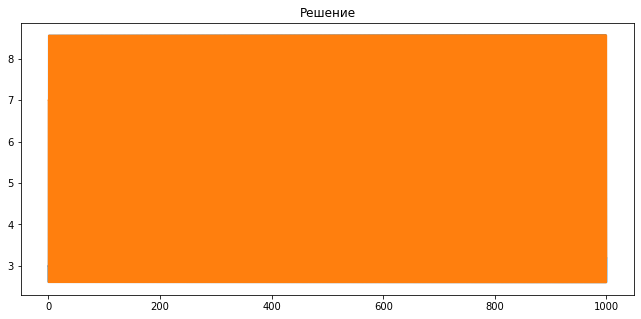

In [6]:
test_func(RungeKuttaSecondSolver(), 3, 7, 0.001, 1000000)

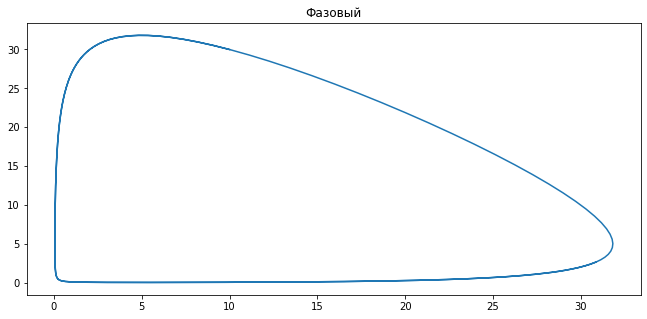

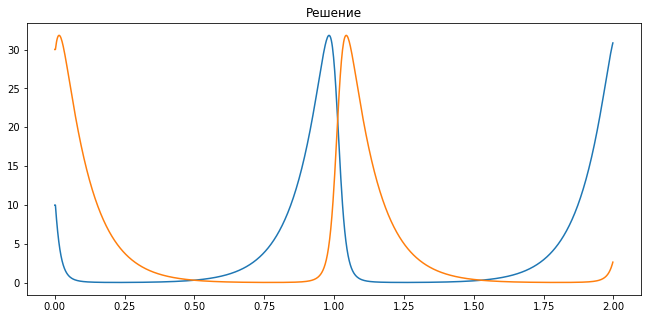

In [123]:
test_func(RungeKuttaFourthSolver(), 10, 30, 0.002, 1000)

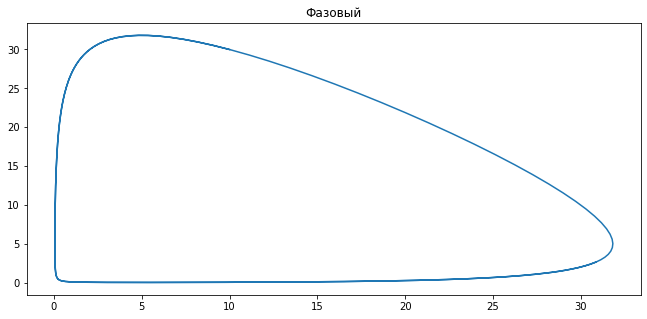

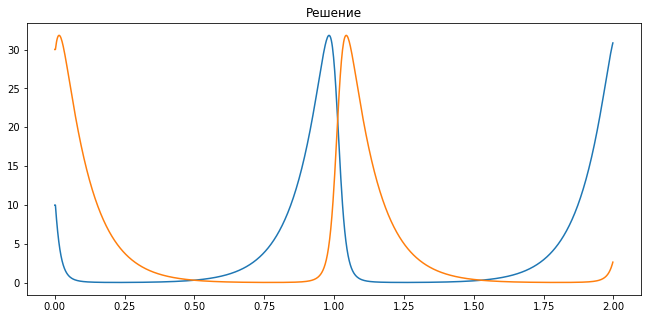

In [124]:
test_func(EulerSolver(), 10, 30, 0.002, 1000)

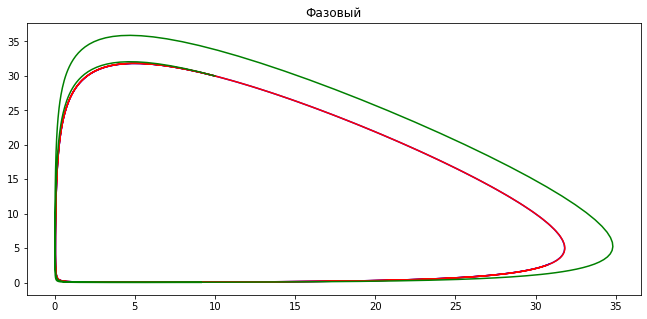

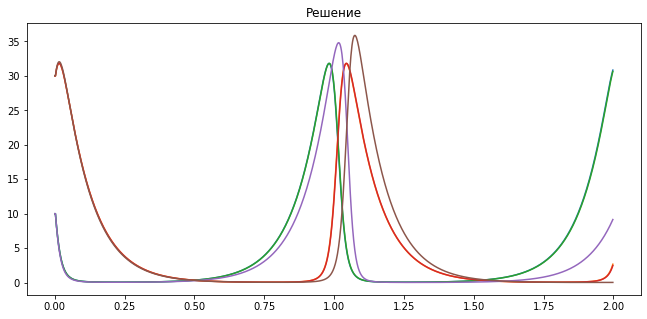

In [125]:
test_all_solvers_func(10, 30, 0.002, 1000)